# Primer entrega del Proyecto Final

**Presentación de la empresa, organización o problema específico**

Análisis de Covid a nivel global, considerando un visión regional y mas especifica a nivel país

***************************************************************************

**Preguntas y objetivos de la investigación**


1) De acuerdo al dataset o datasets a considerar para este proyecto, cual es nivel de contagios a Nivel Global?
2) Cual es la cantidad de muertes debido al covid considerando el avance en el tiempo de este virus?
3) Es posible hacer una compración por país de los afectados considerando el continente en el cual se encuentran?
4) Cuantos tipos de vacunas se pueden distinguir en los datasets de estudio?
5) Cual es porcentaje de utilización a nivel global de cada tipo?
6) Hay alguna relación entre los contagios, las condiciones de vida y situación de cada region del planeta?

* Objetivos específicos

a) Comparar el nivel de contagios y muertes entre las distintas regiones del mundo

b) Armar una muestra representativa de paises de cada región y hacer un comparación entre los mismos, analizando contagios, muertes, cantidad de tipos de vacunas aplicas por región, segmmentación por sexo, condiciones de vida como, expectativa de vida, tabaquismo, etc

c) Establecer relaciones entre las condiciciones de vida, tipo de vacuna y evolución de contagios en el tiempo

d) Realizar un comparativa entre las aplicaciones de los diferentes tipos de vacunas y su primer apliación



***********************************************************************

**Conformación del equipo de trabajo**

Integrante: Cristian A Correa

****************************************************************

**Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)**

* Fuentes: 

a) World Health Organization (https://covid19.who.int/)

b) HDX - The humanutarian Data Exchange (https://data.humdata.org/)

c) OCHA - United Nations Office for the Coordination of Humanitarian Affairs (https://www.unocha.org/)

d) Data on COVID-19 (coronavirus) by Our World in Data - (https://github.com/owid/covid-19-data/tree/master/public/data/)


* Criterios de selección;

° Considere y fuentes que tengan información a nivel global, los mismos presentan datasets voluminosos y completos, no obstante complementando varias fuentes creo que se obtiene un visión más completa y certera para poder abordar el proyecto desde distintas ópticas




********************************************************************

**Generación del primer Data Wrangling y EDA apuntando a sus insights univariado, bivariado y multivariado**

In [1]:
# primero importamos la librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling

#importamos el render de configuración de plotly
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
df_Covid_Vaccination = pd.read_csv('./Data/vaccination-data.csv')
df_Covid_Vaccination.head()

COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
0     Afghanistan  AFG       EMRO   REPORTING   2022-03-06   
1         Albania  ALB       EURO   REPORTING   2022-02-20   
2         Algeria  DZA       AFRO   REPORTING   2022-02-20   
3  American Samoa  ASM       WPRO   REPORTING   2022-02-16   
4         Andorra  AND       EURO   REPORTING   2022-02-13   

   TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
0             5597130                      4952744.0   
1             2707658                      1284034.0   
2            13631683                      7456361.0   
3               85050                        42212.0   
4              142420                        57797.0   

   TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
0                     14.378                                12.723   
1                     94.100                                45.118   
2                     31.086                                17.004   
3                    154.084                                76.475   
4                    184.300                                75.872   

   PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
0                 4281934.0                           11.000   
1                 1192155.0                           41.889   
2                 6076272.0                           13.857   
3                   37805.0                           68.491   
4                   53250.0                           69.903   

                                       VACCINES_USED FIRST_VACCINE_DATE  \
0  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...         2021-02-22   
1  AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...         2021-01-13   
2  Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...         2021-01-30   
3  Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...         2020-12-21   
4  AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...         2021-01-20   

   NUMBER_VACCINES_TYPES_USED  
0                         4.0  
1                         5.0  
2                         4.0  
3                         3.0  
4                         3.0

In [3]:
#Verificamos las columnas que tenemos en nuestro DataSet
df_Covid_Vaccination.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED'],
      dtype='object')

In [4]:
#Vemos la dimensión de nuestro DataSet
df_Covid_Vaccination.shape

(228, 14)

In [5]:
#Verificamos el tipo de datos de que tenemos
df_Covid_Vaccination.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                        int64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

In [6]:
#Comprobamos la totalidad de registros que tenemos por columna
df_Covid_Vaccination.count()

COUNTRY                                 228
ISO3                                    228
WHO_REGION                              228
DATA_SOURCE                             228
DATE_UPDATED                            228
TOTAL_VACCINATIONS                      228
PERSONS_VACCINATED_1PLUS_DOSE           227
TOTAL_VACCINATIONS_PER100               228
PERSONS_VACCINATED_1PLUS_DOSE_PER100    227
PERSONS_FULLY_VACCINATED                227
PERSONS_FULLY_VACCINATED_PER100         227
VACCINES_USED                           225
FIRST_VACCINE_DATE                      208
NUMBER_VACCINES_TYPES_USED              225
dtype: int64

In [7]:
#Hacemos un estadistico principal
df_Covid_Vaccination.describe()

TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
count        2.280000e+02                   2.270000e+02   
mean         4.694756e+07                   2.187060e+07   
std          2.442809e+08                   1.090964e+08   
min          7.400000e+01                   3.700000e+01   
25%          3.534380e+05                   1.733685e+05   
50%          2.721102e+06                   1.536112e+06   
75%          1.670141e+07                   7.843871e+06   
max          3.138003e+09                   1.276556e+09   

       TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
count                 228.000000                            227.000000   
mean                  122.156500                             55.765784   
std                    71.896713                             27.044030   
min                     0.097000                              0.082000   
25%                    62.841000                             34.350500   
50%                   127.515000                             63.069000   
75%                   178.022250                             77.008000   
max                   335.811000                            124.567000   

       PERSONS_FULLY_VACCINATED  PERSONS_FULLY_VACCINATED_PER100  \
count              2.270000e+02                       227.000000   
mean               1.928435e+07                        50.121868   
std                9.958222e+07                        26.417687   
min                3.700000e+01                         0.077000   
25%                1.458095e+05                        29.097500   
50%                1.192155e+06                        53.974000   
75%                6.861035e+06                        72.275500   
max                1.235633e+09                       121.448000   

       NUMBER_VACCINES_TYPES_USED  
count                  225.000000  
mean                     3.928889  
std                      1.928247  
min                      1.000000  
25%                      2.000000  
50%                      4.000000  
75%                      5.000000  
max                     11.000000

In [8]:
#Vemos la información traspuesta
df_Covid_Vaccination.describe().T

count          mean           std  \
TOTAL_VACCINATIONS                    228.0  4.694756e+07  2.442809e+08   
PERSONS_VACCINATED_1PLUS_DOSE         227.0  2.187060e+07  1.090964e+08   
TOTAL_VACCINATIONS_PER100             228.0  1.221565e+02  7.189671e+01   
PERSONS_VACCINATED_1PLUS_DOSE_PER100  227.0  5.576578e+01  2.704403e+01   
PERSONS_FULLY_VACCINATED              227.0  1.928435e+07  9.958222e+07   
PERSONS_FULLY_VACCINATED_PER100       227.0  5.012187e+01  2.641769e+01   
NUMBER_VACCINES_TYPES_USED            225.0  3.928889e+00  1.928247e+00   

                                         min          25%          50%  \
TOTAL_VACCINATIONS                    74.000  353438.0000  2721102.500   
PERSONS_VACCINATED_1PLUS_DOSE         37.000  173368.5000  1536112.000   
TOTAL_VACCINATIONS_PER100              0.097      62.8410      127.515   
PERSONS_VACCINATED_1PLUS_DOSE_PER100   0.082      34.3505       63.069   
PERSONS_FULLY_VACCINATED              37.000  145809.5000  1192155.000   
PERSONS_FULLY_VACCINATED_PER100        0.077      29.0975       53.974   
NUMBER_VACCINES_TYPES_USED             1.000       2.0000        4.000   

                                               75%           max  
TOTAL_VACCINATIONS                    1.670141e+07  3.138003e+09  
PERSONS_VACCINATED_1PLUS_DOSE         7.843871e+06  1.276556e+09  
TOTAL_VACCINATIONS_PER100             1.780223e+02  3.358110e+02  
PERSONS_VACCINATED_1PLUS_DOSE_PER100  7.700800e+01  1.245670e+02  
PERSONS_FULLY_VACCINATED              6.861035e+06  1.235633e+09  
PERSONS_FULLY_VACCINATED_PER100       7.227550e+01  1.214480e+02  
NUMBER_VACCINES_TYPES_USED            5.000000e+00  1.100000e+01

In [9]:
#Ahora hacemos un describe especifico de las personas con vacunación completa
df_Covid_Vaccination.PERSONS_FULLY_VACCINATED_PER100.describe()

count    227.000000
mean      50.121868
std       26.417687
min        0.077000
25%       29.097500
50%       53.974000
75%       72.275500
max      121.448000
Name: PERSONS_FULLY_VACCINATED_PER100, dtype: float64

c:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\crist\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



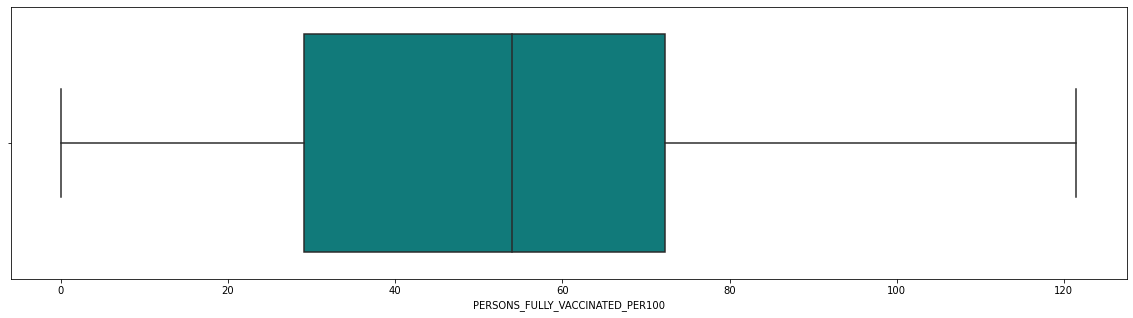

In [10]:
#Hacemos un boxplot
plt.figure(figsize=(20,5))
sns.boxplot(df_Covid_Vaccination.PERSONS_FULLY_VACCINATED_PER100, orient='v', palette=['#008B8B','#00FFFF'])
plt.show()

In [11]:
#Ahora hacemos un analisis de la cantidad de vacunas utilizadas
df_Covid_Vaccination.NUMBER_VACCINES_TYPES_USED.describe()

count    225.000000
mean       3.928889
std        1.928247
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       11.000000
Name: NUMBER_VACCINES_TYPES_USED, dtype: float64

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribución de Nro de tipo de Vacunas')

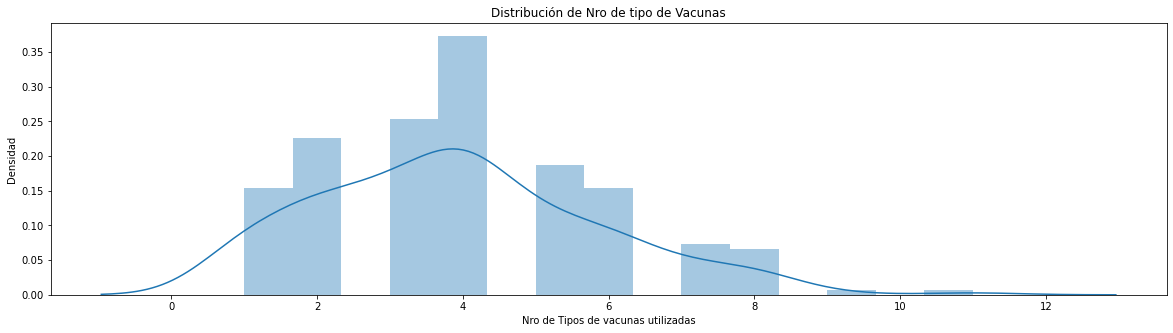

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(df_Covid_Vaccination.NUMBER_VACCINES_TYPES_USED, kde=True, hist=True, bins=15)
plt.xlabel('Nro de Tipos de vacunas utilizadas')
plt.ylabel('Densidad')
plt.title('Distribución de Nro de tipo de Vacunas')

In [13]:
#Hacemos un panda Profiling para generar un reporte completo de nuestro DF
data_profile = pandas_profiling.ProfileReport(df_Covid_Vaccination)
data_profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


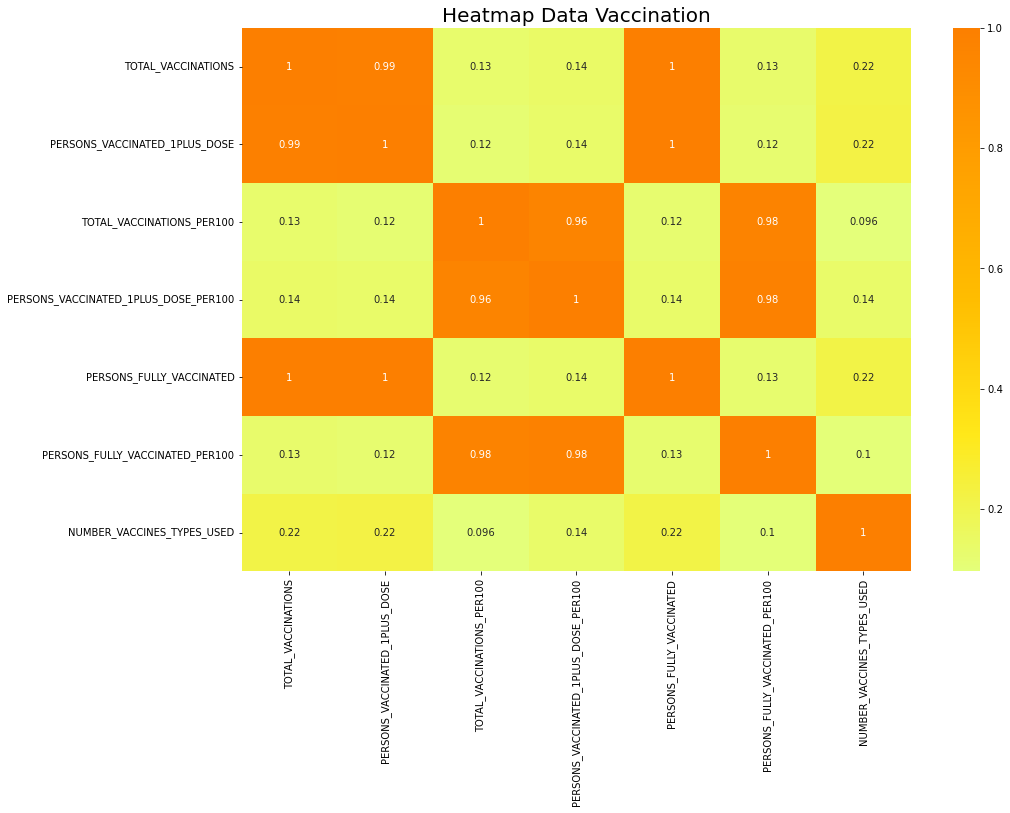

In [14]:
%matplotlib inline

#Vamos a generar un HeatMap propio para la correlación que hay entre las varibales

plt.rcParams['figure.figsize'] = (15,10)

sns.heatmap(df_Covid_Vaccination.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap Data Vaccination', fontsize=20, fontweight=30)
plt.show()

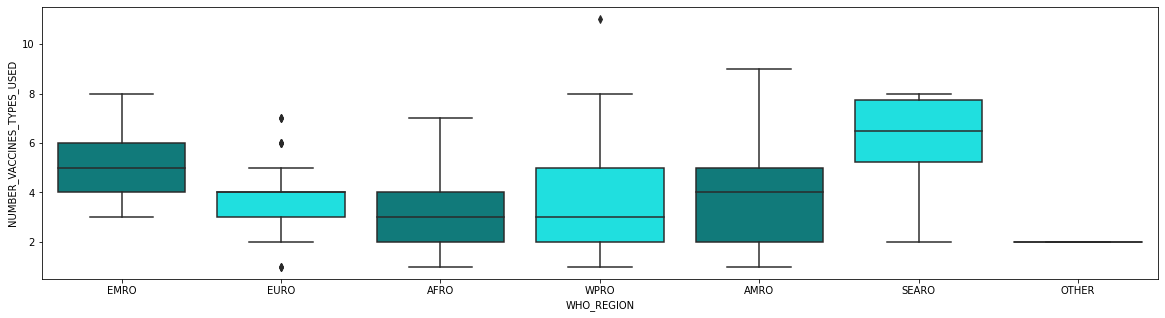

In [15]:
#Hacemos un Boxplot para ver la relacion que hay entre los tipo de vacunas utilizada
#en cada región del planeta

plt.figure(figsize=(20,5))
sns.boxplot(x='WHO_REGION', y='NUMBER_VACCINES_TYPES_USED', data=df_Covid_Vaccination, palette=['#008B8B','#00FFFF'])
plt.show()

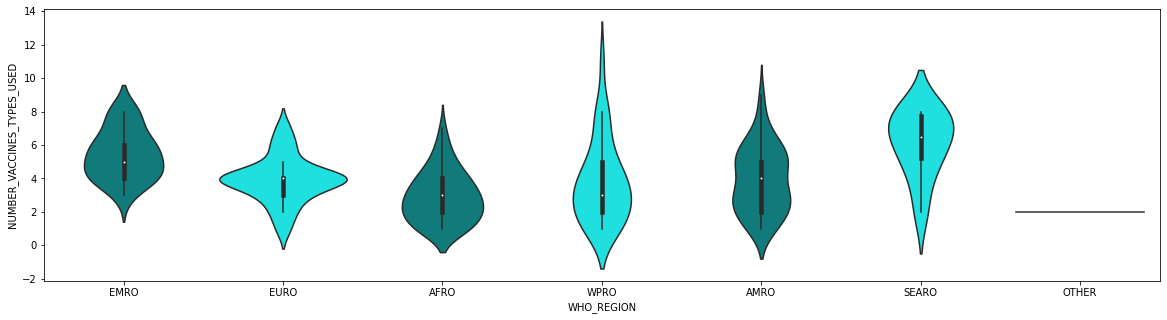

In [16]:
#A través de un violinplot analizamos como se comporta la densidad de los distintos tipos en cada región

plt.figure(figsize=(20,5))
sns.violinplot(x='WHO_REGION', y='NUMBER_VACCINES_TYPES_USED', data=df_Covid_Vaccination, palette=['#008B8B','#00FFFF'])
plt.show()

In [17]:
#importamos y leemos nuestro DataSet y lo instanciamos en una variable df_global
#Tuve que primero setear la tabla en un xlsx, ya que si lo importo desde un
#csv se me mueve las columnas
df_global = pd.read_excel('./Data/WHO-COVID-19-Global-Table-Data.xlsx')
df_global = df_global.rename(columns={'Name': 'COUNTRY'})
df_global.head()

COUNTRY       WHO Region  Cases - cumulative total  \
0                    Global              NaN                 446511318   
1  United States of America         Americas                  78545019   
2                     India  South-East Asia                  42971308   
3                    Brazil         Americas                  29049013   
4                    France           Europe                  22383443   

   Cases - cumulative total per 100000 population  \
0                                    5.728514e+15   
1                                    2.372942e+07   
2                                    3.113853e+06   
3                                    1.366630e+07   
4                                    3.441523e+07   

   Cases - newly reported in last 7 days  \
0                               10551492   
1                                 332439   
2                                  40263   
3                                 280909   
4                                 350648   

   Cases - newly reported in last 7 days per 100000 population  \
0                                       1.353703e+15             
1                                       1.004340e+05             
2                                       2.918000e+03             
3                                       1.321560e+05             
4                                       5.391320e+05             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                  1172188                    6004421   
1                                     5937                     951348   
2                                     3993                     515210   
3                                    15961                     652143   
4                                     1295                     136323   

   Deaths - cumulative total per 100000 population  \
0                                     7.703368e+15   
1                                     2.874140e+05   
2                                     3.733400e+04   
3                                     3.068050e+05   
4                                     2.096010e+05   

   Deaths - newly reported in last 7 days  \
0                                   49993   
1                                   10236   
2                                    1187   
3                                    3009   
4                                    1061   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                       6.413848e+15              
1                                       3.092000e+03              
2                                       8.600000e+01              
3                                       1.416000e+03              
4                                       1.631000e+03              

   Deaths - newly reported in last 24 hours  Column1  
0                                      4993      NaN  
1                                        94      NaN  
2                                       108      NaN  
3                                       216      NaN  
4                                       157      NaN

In [18]:
#Hacemos un shape para conocer la dimensión de nuestro DF
df_global.shape

(238, 13)

In [19]:
#Hacemos info para conocer el tipo de variables, valores nulos, etc
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   COUNTRY                                                       238 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

C:\Users\crist\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1440x720 with 0 Axes>

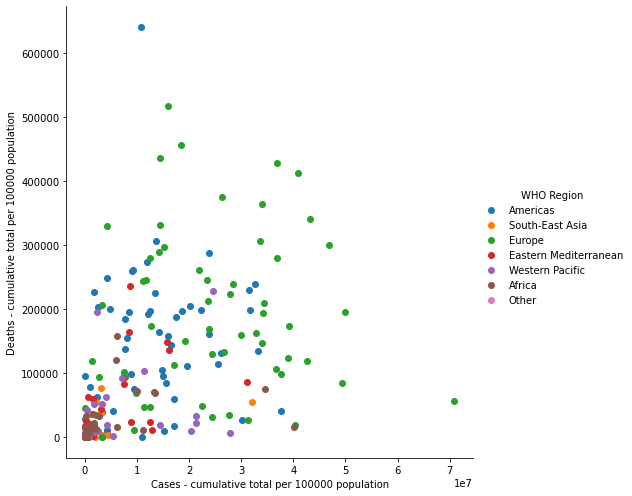

In [20]:
#con un FacetGrid analizamos el comportamiento de mis datos relacionando la cantidad de casos (por 100.000 personas) vs las muertes ocurridas (por 100.000 personas) 
plt.figure(figsize=(20,10))

sns.FacetGrid(df_global, hue='WHO Region', size= 7).map(plt.scatter, 'Cases - cumulative total per 100000 population', 'Deaths - cumulative total per 100000 population').add_legend();
plt.show()

In [21]:
# Eliminamos la "column1" de nuestro df_global, asi vamos limpiando la misma de datos innecesarios
df_global = df_global.drop(columns=['Column1'])
df_global.head()

COUNTRY       WHO Region  Cases - cumulative total  \
0                    Global              NaN                 446511318   
1  United States of America         Americas                  78545019   
2                     India  South-East Asia                  42971308   
3                    Brazil         Americas                  29049013   
4                    France           Europe                  22383443   

   Cases - cumulative total per 100000 population  \
0                                    5.728514e+15   
1                                    2.372942e+07   
2                                    3.113853e+06   
3                                    1.366630e+07   
4                                    3.441523e+07   

   Cases - newly reported in last 7 days  \
0                               10551492   
1                                 332439   
2                                  40263   
3                                 280909   
4                                 350648   

   Cases - newly reported in last 7 days per 100000 population  \
0                                       1.353703e+15             
1                                       1.004340e+05             
2                                       2.918000e+03             
3                                       1.321560e+05             
4                                       5.391320e+05             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                  1172188                    6004421   
1                                     5937                     951348   
2                                     3993                     515210   
3                                    15961                     652143   
4                                     1295                     136323   

   Deaths - cumulative total per 100000 population  \
0                                     7.703368e+15   
1                                     2.874140e+05   
2                                     3.733400e+04   
3                                     3.068050e+05   
4                                     2.096010e+05   

   Deaths - newly reported in last 7 days  \
0                                   49993   
1                                   10236   
2                                    1187   
3                                    3009   
4                                    1061   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                       6.413848e+15              
1                                       3.092000e+03              
2                                       8.600000e+01              
3                                       1.416000e+03              
4                                       1.631000e+03              

   Deaths - newly reported in last 24 hours  
0                                      4993  
1                                        94  
2                                       108  
3                                       216  
4                                       157

In [22]:
#importamos y leemos nuestro nuevo DataSet y lo instanciamos como df_global_II
df_global_II = pd.read_csv('./Data/who-COVID-19-global-data.csv')
df_global_II.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

C:\Users\crist\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



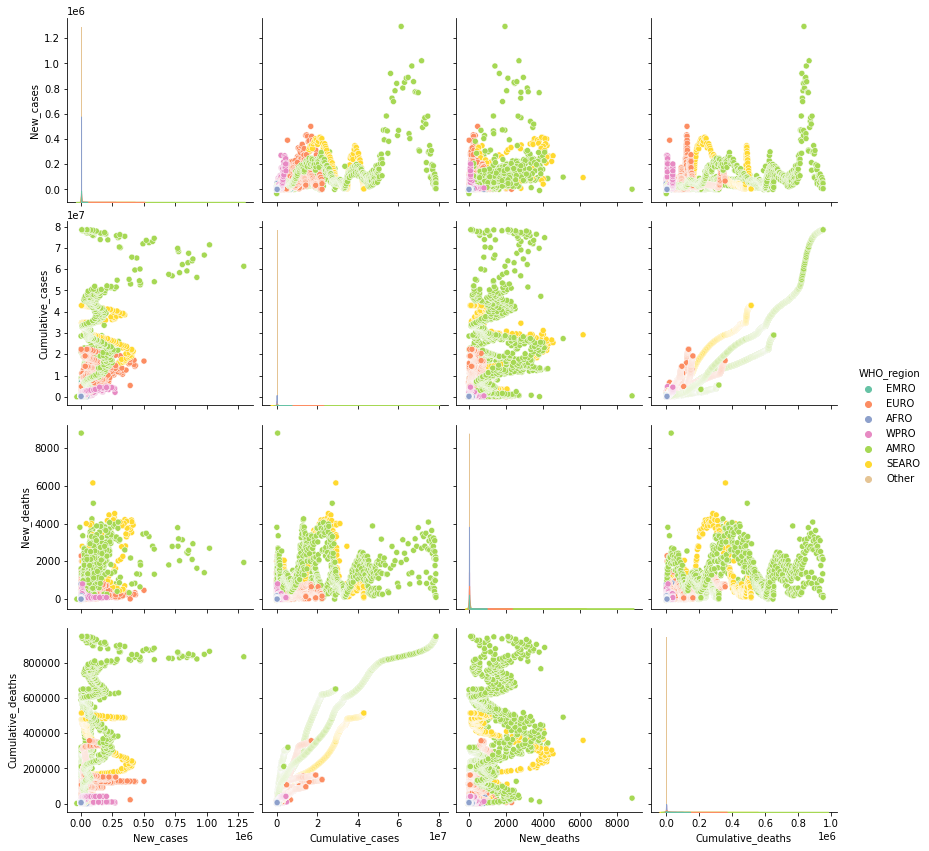

In [23]:
#Hacemos un nuevo pairplot para poder ver mútiples distribuciones por pares y ver la relación que existe
sns.pairplot(df_global_II, hue='WHO_region', size=3, palette='Set2')

*************************************************************

**Contar la historia de sus datos**

Nuestros datos se van a dividir entre escenarios muy especificos;

1) Un escenario Global en el cual intentaremos responder la preguntas que nos hicimos al principio de nuestro proyecto, en donde queremos ver y analizar;

    ° El total de casos vs el total de muertes provocados por el Covid-19

    ° Los distintos tipos de vacunas utilizadas y cual fue la de mayor preponderancia

    ° Establecer si hay un relación entre hombres y mujeres con respecto a contagio y fallecimiento

2) El segundo escenario contrastara regiones tomandos los imputs del escenario 1, y haciendo un analisis con el país con mayor y menor nro de contagios y fallecimientos

3) Y finalmente el tercer escenario analizara en conjunto los resultados del escenario 2, haciendo un comparativa entre los paises con mayor y menor contagio vs fallecimientos

***********************************************************************

**Filtros aplicados a los datos. Distribución. Dataset final para analizar**

Los filtros a aplicar estaran relacionados con los siguientes campos;

1) Región
2) Pais
3) Cantidad de tipos de vacunas
4) Tipos de vacunas
5) Contagios
6) Muertes
7) Sexo


Las distribuciones a emplear serán en principio;
1) Normal


Y el dataset final estara compuesto por el siguiente inner join a realizar;


* Cargamos un nuevo DataSet para poder avanzar con nuestro Join Final

In [11]:
df_Covid_Data_Global_II = pd.read_csv('./Data/owid-covid-data.csv')
df_Covid_Data_Global_II.sample(8)

iso_code      continent       location        date  total_cases  \
25387        BFA         Africa   Burkina Faso  2021-08-13      13668.0   
89094        LBY         Africa          Libya  2020-10-15      46676.0   
166521       VEN  South America      Venezuela  2021-06-02     236755.0   
158624       TUV        Oceania         Tuvalu  2021-08-15          NaN   
3962         AGO         Africa         Angola  2020-08-22       2134.0   
117310  OWID_OCE            NaN        Oceania  2020-05-24       8722.0   
139284       SVK         Europe       Slovakia  2020-06-21       1587.0   
115201  OWID_NAM            NaN  North America  2021-10-24   54763590.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
25387        33.0               8.714         170.0         0.0   
89094       855.0             912.000         681.0        12.0   
166521     1188.0            1335.429        2674.0        13.0   
158624        NaN                 NaN           NaN         NaN   
3962         66.0              36.429          94.0         0.0   
117310        0.0               9.286         123.0         0.0   
139284        1.0               5.571          28.0         0.0   
115201    23747.0           83556.429     1115298.0       331.0   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
25387                 0.143  ...             1.6          23.9   
89094                 9.286  ...             NaN           NaN   
166521               16.429  ...             NaN           NaN   
158624                  NaN  ...             NaN           NaN   
3962                  1.143  ...             NaN           NaN   
117310                0.429  ...             NaN           NaN   
139284                0.000  ...            23.1          37.7   
115201             2130.000  ...             NaN           NaN   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
25387                   11.877                        0.40            61.58   
89094                      NaN                        3.70            72.91   
166521                     NaN                        0.80            72.06   
158624                     NaN                         NaN            67.57   
3962                    26.664                         NaN            61.15   
117310                     NaN                         NaN              NaN   
139284                     NaN                        5.82            77.54   
115201                     NaN                         NaN              NaN   

        human_development_index  excess_mortality_cumulative_absolute  \
25387                     0.452                                   NaN   
89094                     0.724                                   NaN   
166521                    0.711                                   NaN   
158624                      NaN                                   NaN   
3962                      0.581                                   NaN   
117310                      NaN                                   NaN   
139284                    0.860                                -575.1   
115201                      NaN                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
25387                           NaN               NaN   
89094                           NaN               NaN   
166521                          NaN               NaN   
158624                          NaN               NaN   
3962                            NaN               NaN   
117310                          NaN               NaN   
139284                        -2.14             -6.36   
115201                          NaN               NaN   

        excess_mortality_cumulative_per_million  
25387                                       NaN  
89094                                       NaN  
166521                                      NaN  
158624                                      NaN  

- vamos a renombrar la columna ***location*** por ***COUNTRY*** para simplificar el merge a realizar posteriormente

In [12]:
df_Covid_Data_Global_II = df_Covid_Data_Global_II.rename(columns={'location': 'COUNTRY'})
df_Covid_Data_Global_II.sample(8)

iso_code      continent                           COUNTRY        date  \
63421       GRD  North America                           Grenada  2021-09-20   
25471       BFA         Africa                      Burkina Faso  2021-11-05   
42963       DJI         Africa                          Djibouti  2021-08-14   
143940      KOR           Asia                       South Korea  2021-03-16   
131900      VCT  North America  Saint Vincent and the Grenadines  2020-12-10   
94343       MDG         Africa                        Madagascar  2020-07-01   
101945      FSM        Oceania              Micronesia (country)  2022-03-08   
19094       BOL  South America                           Bolivia  2020-08-13   

        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
63421        4077.0      236.0             241.571          55.0         5.0   
25471       15103.0        0.0              44.286         221.0         0.0   
42963       11676.0        0.0               2.429         156.0         0.0   
143940      96849.0      469.0             445.143        1686.0         8.0   
131900         91.0        1.0               0.571           NaN         NaN   
94343        2303.0       89.0              73.714          22.0         2.0   
101945          1.0        0.0               0.000           NaN         NaN   
19094       96459.0     1388.0            1433.714        3884.0        57.0   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
63421                 4.000  ...             NaN           NaN   
25471                 1.000  ...             1.6          23.9   
42963                 0.000  ...             1.7          24.5   
143940                5.429  ...             6.2          40.9   
131900                  NaN  ...             NaN           NaN   
94343                 0.857  ...             NaN           NaN   
101945                  NaN  ...             NaN           NaN   
19094                59.857  ...             NaN           NaN   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
63421                      NaN                        3.70            72.40   
25471                   11.877                        0.40            61.58   
42963                      NaN                        1.40            67.11   
143940                     NaN                       12.27            83.03   
131900                     NaN                        2.60            72.53   
94343                   50.540                        0.20            67.04   
101945                     NaN                         NaN            67.88   
19094                   25.383                        1.10            71.51   

        human_development_index  excess_mortality_cumulative_absolute  \
63421                     0.779                                   NaN   
25471                     0.452                                   NaN   
42963                     0.524                                   NaN   
143940                    0.916                                   NaN   
131900                    0.738                                   NaN   
94343                     0.528                                   NaN   
101945                    0.620                                   NaN   
19094                     0.718                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
63421                           NaN               NaN   
25471                           NaN               NaN   
42963                           NaN               NaN   
143940                          NaN               NaN   
131900                          NaN               NaN   
94343                           NaN               NaN   
101945                          NaN               NaN   
19094                           NaN               NaN   

        excess_mortality_cumulative_per_million  
63421                               

° Analizamos las columnas de nuestro DataFrame para ver cuales nos sirven y cuales vamos a eliminar para no hacer tan pesado el Join final

In [13]:
df_Covid_Data_Global_II.columns

Index(['iso_code', 'continent', 'COUNTRY', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'to

° Vamos a eliminar la columnas que no vamos a utilizar, como por ejemplo:

'iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients','hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'gdp_per_capita', 'handwashing_facilities', 'hospital_beds_per_thousand', 'human_development_index', 'excess_mortality_cumulative_absolute' 

In [14]:
df_Covid_Data_Global_II = df_Covid_Data_Global_II.drop(columns={'iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients','hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'gdp_per_capita', 'handwashing_facilities', 'hospital_beds_per_thousand', 'human_development_index', 'excess_mortality_cumulative_absolute'})
df_Covid_Data_Global_II.columns

Index(['continent', 'COUNTRY', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'life_expectancy',
       'excess_mortality_cumulative', 'excess_mortality'

In [15]:
df_Covid_Data_Global_II.dtypes

continent                                   object
COUNTRY                                     object
date                                        object
total_cases                                float64
new_cases                                  float64
total_deaths                               float64
new_deaths                                 float64
total_cases_per_million                    float64
new_cases_per_million                      float64
total_deaths_per_million                   float64
new_deaths_per_million                     float64
total_tests                                float64
new_tests                                  float64
total_tests_per_thousand                   float64
new_tests_per_thousand                     float64
positive_rate                              float64
tests_per_case                             float64
tests_units                                 object
total_vaccinations                         float64
people_vaccinated              

- ahora cargamos el dataset a utilizar en conjunto con el previo

In [16]:
df_Covid_Vaccination_Clean = df_Covid_Vaccination.drop(columns=['ISO3', 'DATA_SOURCE', 'DATE_UPDATED'])
df_Covid_Vaccination_Clean.head()


COUNTRY WHO_REGION  TOTAL_VACCINATIONS  \
0     Afghanistan       EMRO             5597130   
1         Albania       EURO             2707658   
2         Algeria       AFRO            13631683   
3  American Samoa       WPRO               85050   
4         Andorra       EURO              142420   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                      4952744.0                     14.378   
1                      1284034.0                     94.100   
2                      7456361.0                     31.086   
3                        42212.0                    154.084   
4                        57797.0                    184.300   

   PERSONS_VACCINATED_1PLUS_DOSE_PER100  PERSONS_FULLY_VACCINATED  \
0                                12.723                 4281934.0   
1                                45.118                 1192155.0   
2                                17.004                 6076272.0   
3                                76.475                   37805.0   
4                                75.872                   53250.0   

   PERSONS_FULLY_VACCINATED_PER100  \
0                           11.000   
1                           41.889   
2                           13.857   
3                           68.491   
4                           69.903   

                                       VACCINES_USED FIRST_VACCINE_DATE  \
0  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...         2021-02-22   
1  AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...         2021-01-13   
2  Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...         2021-01-30   
3  Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...         2020-12-21   
4  AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...         2021-01-20   

   NUMBER_VACCINES_TYPES_USED  
0                         4.0  
1                         5.0  
2                         4.0  
3                         3.0  
4                         3.0

* Ahora generamos nuestro dataset final **df_data_merge**, por lo que vamos haciendo varios merge consecutivos para poder juntar toda la info de los datasets a utilizar:

***owid-covid-data (df_Covid_Data_Global_II)***


***vaccination-data (df_Covid_Vaccination_Clean)***

In [17]:
df_data_merge = pd.merge(df_Covid_Data_Global_II, df_Covid_Vaccination_Clean, how='inner', on='COUNTRY')
df_data_merge.head()

continent      COUNTRY        date  total_cases  new_cases  total_deaths  \
0      Asia  Afghanistan  2020-02-24          5.0        5.0           NaN   
1      Asia  Afghanistan  2020-02-25          5.0        0.0           NaN   
2      Asia  Afghanistan  2020-02-26          5.0        0.0           NaN   
3      Asia  Afghanistan  2020-02-27          5.0        0.0           NaN   
4      Asia  Afghanistan  2020-02-28          5.0        0.0           NaN   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0         NaN                    0.126                  0.126   
1         NaN                    0.126                  0.000   
2         NaN                    0.126                  0.000   
3         NaN                    0.126                  0.000   
4         NaN                    0.126                  0.000   

   total_deaths_per_million  ...  WHO_REGION  TOTAL_VACCINATIONS  \
0                       NaN  ...        EMRO             5597130   
1                       NaN  ...        EMRO             5597130   
2                       NaN  ...        EMRO             5597130   
3                       NaN  ...        EMRO             5597130   
4                       NaN  ...        EMRO             5597130   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                      4952744.0                     14.378   
1                      4952744.0                     14.378   
2                      4952744.0                     14.378   
3                      4952744.0                     14.378   
4                      4952744.0                     14.378   

   PERSONS_VACCINATED_1PLUS_DOSE_PER100  PERSONS_FULLY_VACCINATED  \
0                                12.723                 4281934.0   
1                                12.723                 4281934.0   
2                                12.723                 4281934.0   
3                                12.723                 4281934.0   
4                                12.723                 4281934.0   

   PERSONS_FULLY_VACCINATED_PER100  \
0                             11.0   
1                             11.0   
2                             11.0   
3                             11.0   
4                             11.0   

                                       VACCINES_USED  FIRST_VACCINE_DATE  \
0  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
1  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
2  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
3  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
4  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   

   NUMBER_VACCINES_TYPES_USED  
0                         4.0  
1                         4.0  
2                         4.0  
3                         4.0  
4                         4.0  

[5 rows x 53 columns]

* Vemos las dimensiones de nuestro dataframe final

In [18]:
df_data_merge.shape

(138615, 53)

* Ahora vemos las columnas que nos quedaron en el DF final;

In [19]:
df_data_merge.columns

Index(['continent', 'COUNTRY', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'life_expectancy',
       'excess_mortality_cumulative', 'excess_mortality'

* Veamos la cantidad de nulls y su importancia para el resto de la info

In [20]:
df_data_merge.isnull().sum()

continent                                       0
COUNTRY                                         0
date                                            0
total_cases                                  2540
new_cases                                    2681
total_deaths                                14922
new_deaths                                  15082
total_cases_per_million                      2540
new_cases_per_million                        2681
total_deaths_per_million                    14922
new_deaths_per_million                      15082
total_tests                                 74314
new_tests                                   78232
total_tests_per_thousand                    74314
new_tests_per_thousand                      78232
positive_rate                               65818
tests_per_case                              66365
tests_units                                 58762
total_vaccinations                         102181
people_vaccinated                          104216


In [21]:
df_data_merge.isnull().sum() / len(df_data_merge)

continent                                  0.000000
COUNTRY                                    0.000000
date                                       0.000000
total_cases                                0.018324
new_cases                                  0.019341
total_deaths                               0.107651
new_deaths                                 0.108805
total_cases_per_million                    0.018324
new_cases_per_million                      0.019341
total_deaths_per_million                   0.107651
new_deaths_per_million                     0.108805
total_tests                                0.536118
new_tests                                  0.564383
total_tests_per_thousand                   0.536118
new_tests_per_thousand                     0.564383
positive_rate                              0.474826
tests_per_case                             0.478772
tests_units                                0.423922
total_vaccinations                         0.737157
people_vacci

* Debido al tipo de información lo logico es agregar un ***0*** a la información faltante, ya que por ejemplo eso indicaria que ese dia no hubo casos, positivos o fallecimientos, lo cual nos sirve para conitnuar con nuestro analisis.

In [22]:
df_data_merge_without_nan = df_data_merge.fillna(0)
df_data_merge_without_nan.sample(8)

continent                           COUNTRY        date  \
109022  North America                       Saint Lucia  2021-01-19   
71373            Asia                        Kyrgyzstan  2021-10-31   
101143        Oceania                  Papua New Guinea  2021-08-15   
73395          Africa                           Lesotho  2021-05-01   
106575         Europe                           Romania  2021-12-18   
109585  North America  Saint Vincent and the Grenadines  2020-07-24   
123249         Africa                             Sudan  2022-01-25   
23730          Africa                          Cameroon  2021-03-26   

        total_cases  new_cases  total_deaths  new_deaths  \
109022        656.0       35.0           8.0         0.0   
71373      181259.0       73.0        2671.0         3.0   
101143      17806.0        0.0         192.0         0.0   
73395       10731.0        0.0         316.0         0.0   
106575    1797706.0      733.0       58143.0        64.0   
109585         52.0        0.0           0.0         0.0   
123249      55833.0      684.0        3411.0         7.0   
23730       47669.0     7047.0         721.0       120.0   

        total_cases_per_million  new_cases_per_million  \
109022                 3557.464                189.804   
71373                 27346.034                 11.013   
101143                 1952.625                  0.000   
73395                  4970.202                  0.000   
106575                93984.077                 38.321   
109585                  467.336                  0.000   
123249                 1243.238                 15.231   
23730                  1750.975                258.850   

        total_deaths_per_million  ...  WHO_REGION  TOTAL_VACCINATIONS  \
109022                    43.384  ...        AMRO              116213   
71373                    402.966  ...        EURO             2492189   
101143                    21.055  ...        WPRO              412501   
73395                    146.360  ...        AFRO              926760   
106575                  3039.716  ...        EURO            15831189   
109585                     0.000  ...        AMRO               67378   
123249                    75.953  ...        EMRO             5711034   
23730                     26.484  ...        AFRO             1272574   

        PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
109022                        57622.0                     63.288   
71373                       1320378.0                     38.200   
101143                       310659.0                      4.610   
73395                        782175.0                     43.261   
106575                      8147081.0                     81.900   
109585                        35207.0                     60.734   
123249                      5126250.0                     13.024   
23730                       1073258.0                      4.794   

        PERSONS_VACCINATED_1PLUS_DOSE_PER100  PERSONS_FULLY_VACCINATED  \
109022                                31.380                   51912.0   
71373                                 20.238                 1110070.0   
101143                                 3.472                  250256.0   
73395                                 36.512                  727528.0   
106575                                42.150                 8056216.0   
109585                                31.735                   29118.0   
123249                                11.691                 2333416.0   
23730                                  4.043                  813063.0   

        PERSONS_FULLY_VACCINATED_PER100  \
109022                           28.270   
71373                            17.015   
101143                            2.797   
73395                            33.961   
106575                           41.680   
109585                           26.247   
123249                            5.321   
23730                     

In [23]:
df_data_merge_without_nan.isnull().sum()

continent                                  0
COUNTRY                                    0
date                                       0
total_cases                                0
new_cases                                  0
total_deaths                               0
new_deaths                                 0
total_cases_per_million                    0
new_cases_per_million                      0
total_deaths_per_million                   0
new_deaths_per_million                     0
total_tests                                0
new_tests                                  0
total_tests_per_thousand                   0
new_tests_per_thousand                     0
positive_rate                              0
tests_per_case                             0
tests_units                                0
total_vaccinations                         0
people_vaccinated                          0
people_fully_vaccinated                    0
total_boosters                             0
new_vaccin

*******************************************************************************************************

# Vamos a trabajar con un modelo candidato: "PCA"

* generamos el df a utilizar con una supresión de columnas;

In [37]:
df_PCA = df_data_merge_without_nan[[ 'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'WHO_REGION']]
df_PCA.head()

extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              0.0                597.029                 9.59   
1              0.0                597.029                 9.59   
2              0.0                597.029                 9.59   
3              0.0                597.029                 9.59   
4              0.0                597.029                 9.59   

   life_expectancy WHO_REGION  
0            64.83       EMRO  
1            64.83       EMRO  
2            64.83       EMRO  
3            64.83       EMRO  
4            64.83       EMRO

* Vamos a tratar de agrupar a las personas de acuerdo a la región que habitan considerando los siguientes features:  'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy'

* Hacemos el preprocesamiento:

In [38]:
X = df_PCA.drop('WHO_REGION', 1)
y = df_PCA['WHO_REGION']

C:\Users\crist\AppData\Local\Temp/ipykernel_15776/77801359.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



* Hacemos la separación en train y test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* Normalizamos los datos para que PCA funcione mejor

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Aplicamos el PCA

In [41]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

* Hacemos un análisis de la varianza para cada componente

In [42]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.41662323, 0.27953824, 0.15883361, 0.14500491])

***Insights:***

Podemos observar que entre el primer y segundo componente tenemos casi un 69% de explicación de la varianza y si sumamos un tercer componente ya tenemos casi el 84%

* Para finalizar usamos dos componente para entrenar un Random Forest y evaluar como funciona:

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

* Aplicamos el Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

* Creamos el modelo, considerando como depth las posible zonas a considerar

In [45]:
model_rf = RandomForestClassifier(max_depth=6, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

* Hacemos nuestra predicción

In [46]:
y_pred = model_rf.predict(X_test)

* Por último evaluamos nuestro modelo para ver como se comporta:

In [47]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)



El accuracy del modelo es: 0.8451466291526891


* Ahora vamos a aplicar k-means para hacer una clusterización y el silhouette_score para evaluar el K que mejor se adapta o tiene mejor score;

Cargamos las librerias que nos faltan

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* Utilizamos nuevamente el preprocesamiento que ya habiamos realizad;

In [49]:
X = df_PCA.drop('WHO_REGION', 1)
y = df_PCA['WHO_REGION']

C:\Users\crist\AppData\Local\Temp/ipykernel_15776/77801359.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



* Hacemos la creación de nuestro K-Means

En el Nro de Cluster vamos a utilizar un n_cluster = 7, que corresponde al Nro de regiones que tenemos en nuestro Dataset

In [55]:
km = KMeans(n_clusters=2, random_state=42)
km.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1])

* Ahora hacemos el calculo de Silhouette

In [56]:
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.504


* Tal com vimos en la cursada, vamos a utilizar Yellowbrick que nos ayuda a la selección del modelo y el ajuste de hiperparámetros. En esta caso vamos a generar un grafico de silueta oara clústeres de k-medias con n_cluster: 2, 3, 4, 5, 6, 7

* Importamos las librerias que necesitamos para este caso;

In [57]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

* Definimos el tamaño del gráfico a generar, posteriormente generamos las instancias de k-means para distintas cantidades de clúster y finalmente hacemos la visualización a través del indice de Silhouette con Yellowbrick

IndexError: index 2 is out of bounds for axis 0 with size 2

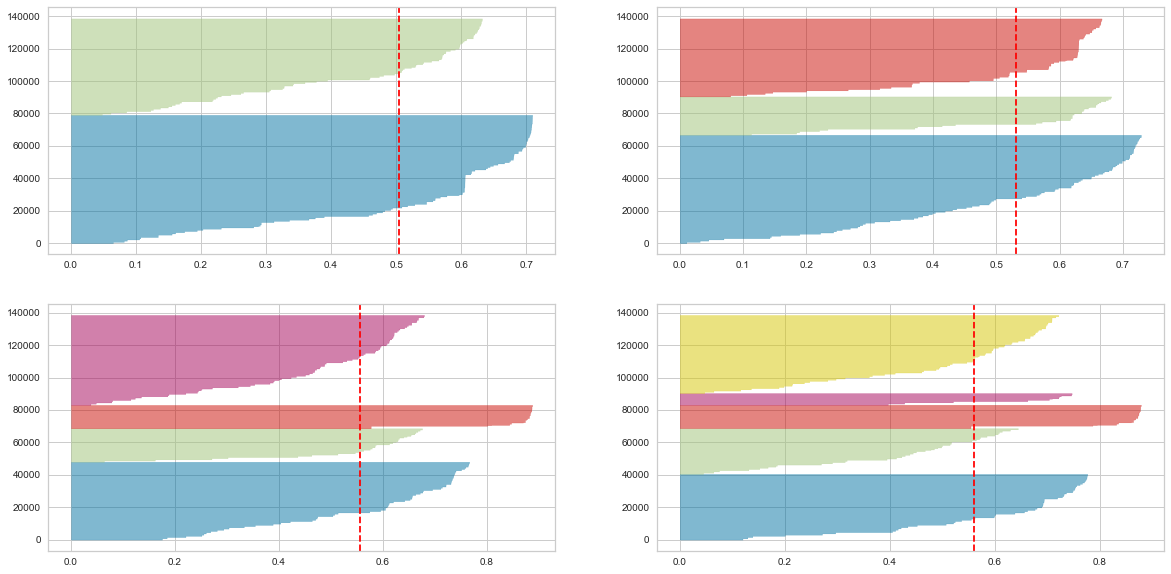

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [59]:
km = KMeans(n_clusters=5, random_state=42)
km.fit_predict(X)

array([3, 3, 3, ..., 4, 4, 4])

In [60]:
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.561


## Conclusiones

Tal como podemos observar, obtuvimos una mejora teniendo en cuenta el indice de Silhouette y el mejor indice que nos proporciona esta técnica, no obstante este 0.561 dista mucho del 0,845 obstenido previamente con aplicación de PCA y un modelo de Random Forest, el cual todavía se puede llegar a mejor y vamos a trabajar para obtener el modelo que mejor nos ayude en la clasificación tanto Región en base a determinados features, como las cantidad de tipos de vacunas utilizados en cada Región

**********************************************************

* Definir objetivo u objetivos para trabajar esos datos

Teniendo el DataSet final definido vamos a trabajar y visualizar el impacto del Covid, sino también analizar features y su impacto en la distintas regiones del planeta considerando las preguntas que nos hicimos la principio del proyecto

1) De acuerdo al dataset o datasets a considerar para este proyecto, cual es nivel de contagios a Nivel Global?

In [28]:
df_data_merge_without_nan.head()

continent      COUNTRY        date  total_cases  new_cases  total_deaths  \
0      Asia  Afghanistan  2020-02-24          5.0        5.0           0.0   
1      Asia  Afghanistan  2020-02-25          5.0        0.0           0.0   
2      Asia  Afghanistan  2020-02-26          5.0        0.0           0.0   
3      Asia  Afghanistan  2020-02-27          5.0        0.0           0.0   
4      Asia  Afghanistan  2020-02-28          5.0        0.0           0.0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0         0.0                    0.126                  0.126   
1         0.0                    0.126                  0.000   
2         0.0                    0.126                  0.000   
3         0.0                    0.126                  0.000   
4         0.0                    0.126                  0.000   

   total_deaths_per_million  ...  WHO_REGION  TOTAL_VACCINATIONS  \
0                       0.0  ...        EMRO             5597130   
1                       0.0  ...        EMRO             5597130   
2                       0.0  ...        EMRO             5597130   
3                       0.0  ...        EMRO             5597130   
4                       0.0  ...        EMRO             5597130   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                      4952744.0                     14.378   
1                      4952744.0                     14.378   
2                      4952744.0                     14.378   
3                      4952744.0                     14.378   
4                      4952744.0                     14.378   

   PERSONS_VACCINATED_1PLUS_DOSE_PER100  PERSONS_FULLY_VACCINATED  \
0                                12.723                 4281934.0   
1                                12.723                 4281934.0   
2                                12.723                 4281934.0   
3                                12.723                 4281934.0   
4                                12.723                 4281934.0   

   PERSONS_FULLY_VACCINATED_PER100  \
0                             11.0   
1                             11.0   
2                             11.0   
3                             11.0   
4                             11.0   

                                       VACCINES_USED  FIRST_VACCINE_DATE  \
0  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
1  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
2  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
3  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   
4  Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...          2021-02-22   

   NUMBER_VACCINES_TYPES_USED  
0                         4.0  
1                         4.0  
2                         4.0  
3                         4.0  
4                         4.0  

[5 rows x 53 columns]

In [65]:
casos_totales_new = df_data_merge_without_nan['new_cases'].sum()
print('El Total de casos positivos(contagios) en nuestro DataSet de estudio es de : ', casos_totales_new)

El Total de casos positivos(contagios) en nuestro DataSet de estudio es de :  328680343.0


2) Cual es la cantidad de muertes debido al covid considerando el avance en el tiempo de este virus?

In [19]:
df_data_merge_without_nan.columns

Index(['continent', 'COUNTRY', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'life_expectancy',
       'excess_mortality_cumulative', 'excess_mortality'

TypeError: can't multiply sequence by non-int of type 'float'

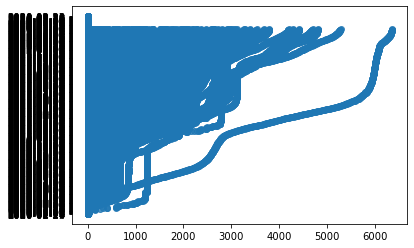

In [26]:
sns.regplot(x="total_deaths_per_million", y=df_data_merge_without_nan['date'], data=df_data_merge_without_nan)

3) Es posible hacer una compración por país de los afectados considerando el continente en el cual se encuentran?

In [54]:

df_country = df_data_merge_without_nan.loc[:, ['continent', 'COUNTRY', 'new_cases']].groupby(['continent','COUNTRY']).sum()
df_country.style.background_gradient(cmap='Reds')


4) Cuantos tipos de vacunas se pueden distinguir en los datasets de estudio?

In [71]:
df_country_vaccines = df_data_merge_without_nan.loc[:, ['continent', 'COUNTRY', 'NUMBER_VACCINES_TYPES_USED']].groupby(['continent','COUNTRY']).max()
df_country_vaccines.style.background_gradient(cmap='Greens')


5) Cual es porcentaje de utilización a nivel global de cada tipo?
6) Hay alguna relación entre los contagios, las condiciones de vida y situación de cada region del planeta?

* Objetivos específicos

a) Comparar el nivel de contagios y muertes entre las distintas regiones del mundo

b) Armar una muestra representativa de paises de cada región y hacer un comparación entre los mismos, analizando contagios, muertes, cantidad de tipos de vacunas aplicas por región, segmmentación por sexo, condiciones de vida como, expectativa de vida, tabaquismo, etc

c) Establecer relaciones entre las condiciciones de vida, tipo de vacuna y evolución de contagios en el tiempo

d) Realizar un comparativa entre las aplicaciones de los diferentes tipos de vacunas y su primer apliación
